In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage
import numpy as np
import cv2

# Create the image of a paraboloid with one axis scaled (like an oval paraboloid)


Plot em 3d


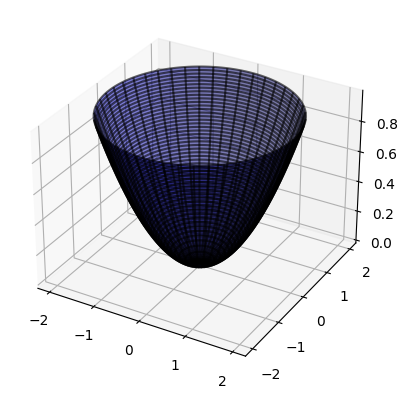


Plot em 2d


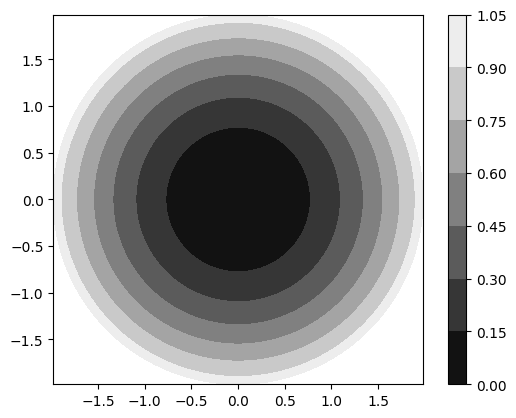

In [5]:
theta = np.arange(0, 2*np.pi, 0.02)
z = np.arange(0 , 1 ,0.02)

theta, z_ = np.meshgrid(theta, z)

r = np.sqrt(4*z_)

x = r * np.cos(theta)
y = r * np.sin(theta)
z = z_

#plot em 3d
print("\nPlot em 3d")
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(x,y,z, color = 'blue', alpha = 0.5)
ax.plot_wireframe(x,y,z, color = 'black', alpha = 0.6)

plt.show()

#plot em 2d
print("\nPlot em 2d")
h = plt.contourf(x,y,z, cmap = 'gray')
plt.axis('scaled')
plt.colorbar()

plt.show()


## Create the image of a rotated sin using rotation of coordinates

In [6]:
# Make data.
a = np.arange(-10, 10, 0.1)
b = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(a, b)
Z = np.sin(X)

Antes da rotação:


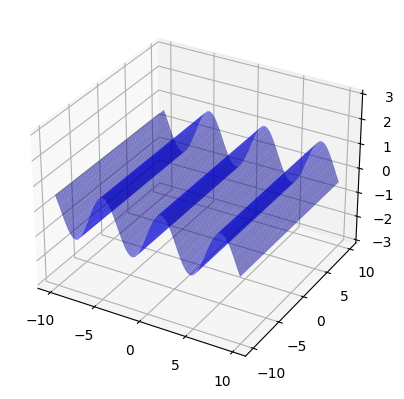


Após rotação:


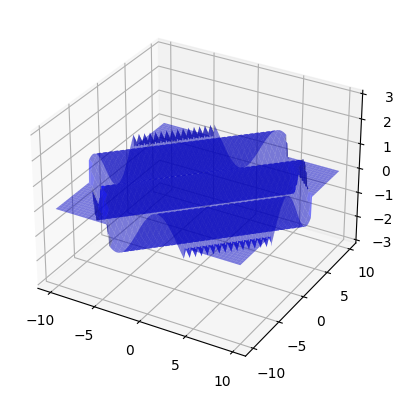


Vista superior em tons de cinza:


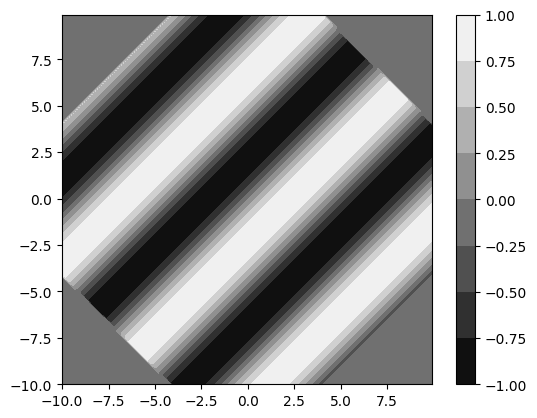

In [7]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
print("Antes da rotação:")

X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X)

ax.plot_surface(X, Y, Z, color = 'blue', alpha = 0.5)

ax.set_zlim(-3.01,3.01)

plt.show()



print("\nApós rotação:")
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Z =  ndimage.rotate(Z,45, reshape=False)

ax.plot_surface(X, Y, Z, color = 'blue', alpha = 0.5)
ax.set_zlim(-3.01,3.01)

plt.show()


print("\nVista superior em tons de cinza:")
h = plt.contourf(X, Y, Z, cmap = 'gray')
plt.axis('scaled')
plt.colorbar()
plt.show()

Plot em 3d


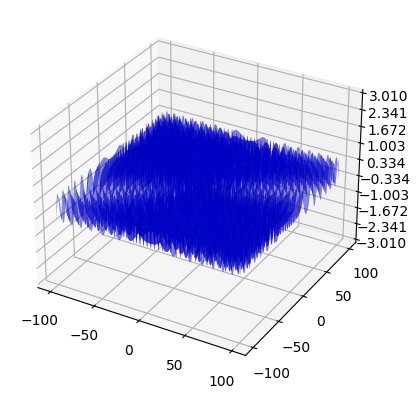


Plot em 2d


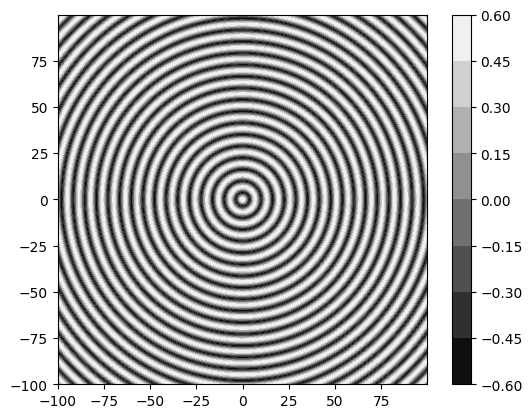

In [8]:
a = np.arange(-100, 100, 0.1)
b = np.arange(-100, 100, 0.1)
X, Y = np.meshgrid(a, b)
Z = (np.sin(np.sqrt(X**2 + Y**2)+1))/2

print('Plot em 3d')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, Z, color = 'blue', alpha = 0.5)

ax.set_zlim(-3.01,3.01)
ax.zaxis.set_major_locator(LinearLocator(10))
plt.show()



print('\nPlot em 2d')
h = plt.contourf(X, Y, Z, cmap = 'gray')
plt.axis('scaled')
plt.colorbar()
plt.show()

## Create the image of a gaussian

Plot em 3d


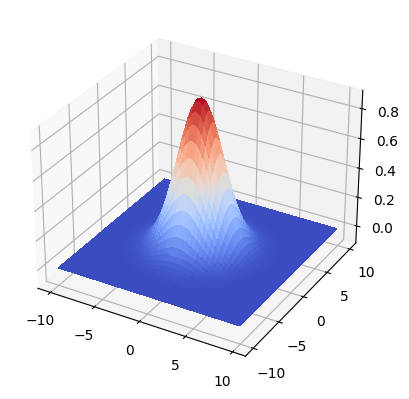


Plot em 2d


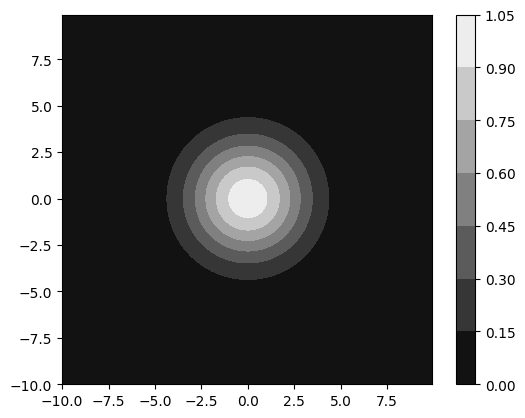

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-0.1*X**2-0.1*Y**2)

#plot em 3d
print("Plot em 3d")
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(-0.1, 0.9)


plt.show()

#plot em 2d
print("\nPlot em 2d")
h = plt.contourf(X, Y, Z, cmap = 'gray')
plt.axis('scaled')
plt.colorbar()

plt.show()

## Create a function that generates the image of a Gaussian optionally rotated by an angle theta and with mx, my, sx, sy as input arguments.

In [10]:
def rotateGaussian(mx, my, sx, sy, theta):

    X = np.arange(-10, 10, 0.1)
    Y = np.arange(-10, 10, 0.1)
    X, Y = np.meshgrid(X, Y)
    
    theta = np.radians(theta)

    sx = sx**2; 
    sy = sy**2
    
    coef_1 = np.cos(theta)**2/(2*sx) + np.sin(theta)**2/(2*sy)
    coef_2 = np.sin(theta)**2/(2*sx) + np.cos(theta)**2/(2*sy)
    coef_3 = np.sin(2*theta)/(4*sx) - np.sin(2*theta)/(4*sy)

    Z = np.exp(-coef_1*(X-mx)**2 - coef_2*(Y-my)**2 - 2*coef_3*(X-mx)*(Y-my))

    print("Plot em 3d:")
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    ax.set_zlim(-0.1, 1)
    ax.plot_surface(X,Y,Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    plt.show()

    print("Plot em 2d:")
    plt.contourf(X, Y, Z, cmap = 'gray')
    plt.axis('scaled')
    plt.colorbar()

In [11]:
#Setup
# theta = 45 #dgr
# mx = -5
# my = -6.5
# sx = 2
# sy = 1

In [13]:
import ipywidgets as widgets
from IPython.display import display
# Define the initial values
mx = -5
my = -6.5
sx = 2
sy = 1
theta = 45

# Define the function to update the plot
def update_plot(mx, my, sx, sy, theta):
    rotateGaussian(mx, my, sx, sy, theta)

# Create the sliders
mx_slider = widgets.FloatSlider(value=mx, min=-10, max=10, step=0.1, description='mx:')
my_slider = widgets.FloatSlider(value=my, min=-10, max=10, step=0.1, description='my:')
sx_slider = widgets.FloatSlider(value=sx, min=0.1, max=10, step=0.1, description='sx:')
sy_slider = widgets.FloatSlider(value=sy, min=0.1, max=10, step=0.1, description='sy:')
theta_slider = widgets.FloatSlider(value=theta, min=0, max=360, step=1, description='theta:')

# Create the interactive plot
widgets.interact(update_plot, mx=mx_slider, my=my_slider, sx=sx_slider, sy=sy_slider, theta=theta_slider)

# Display the sliders
display(mx_slider, my_slider, sx_slider, sy_slider, theta_slider)


interactive(children=(FloatSlider(value=-5.0, description='mx:', max=10.0, min=-10.0), FloatSlider(value=-6.5,…

FloatSlider(value=-5.0, description='mx:', max=10.0, min=-10.0)

FloatSlider(value=-6.5, description='my:', max=10.0, min=-10.0)

FloatSlider(value=2.0, description='sx:', max=10.0, min=0.1)

FloatSlider(value=1.0, description='sy:', max=10.0, min=0.1)

FloatSlider(value=45.0, description='theta:', max=360.0, step=1.0)

In [14]:
#Faça uma imagem laplaciana

# Setup
# sigma = 1
# theta = 0
# mx = 0
# my = 0

# Define the function to update the plot
def update_plot(sigma, theta, mx, my):
    X = np.arange(-10, 10, 0.1)
    Y = np.arange(-10, 10, 0.1)
    X, Y = np.meshgrid(X, Y)

    theta = np.radians(theta)

    sx = sigma**2; 
    sy = sigma**2

    coef_1 = np.cos(theta)**2/(2*sx) + np.sin(theta)**2/(2*sy)
    coef_2 = np.sin(theta)**2/(2*sx) + np.cos(theta)**2/(2*sy)
    coef_3 = np.sin(2*theta)/(4*sx) - np.sin(2*theta)/(4*sy)

    Z = np.exp(-coef_1*(X-mx)**2 - coef_2*(Y-my)**2 - 2*coef_3*(X-mx)*(Y-my))

    Z = ndimage.laplace(Z, mode='reflect')

    print("Plot em 3d:")
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    ax.set_zlim(-0.1, 1)
    ax.plot_surface(X,Y,Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    plt.show()

    print("Plot em 2d:")
    plt.contourf(X, Y, Z, cmap = 'gray')
    plt.axis('scaled')
    plt.colorbar()

# Create the sliders
sigma_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='sigma:')
theta_slider = widgets.FloatSlider(value=0, min=0, max=360, step=1, description='theta:')
mx_slider = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='mx:')
my_slider = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='my:')
# Create the interactive plot
widgets.interact(update_plot, sigma=sigma_slider, theta=theta_slider, mx=mx_slider, my=my_slider)

# Display the sliders
display(sigma_slider, theta_slider, mx_slider, my_slider)

interactive(children=(FloatSlider(value=1.0, description='sigma:', max=10.0, min=0.1), FloatSlider(value=0.0, …

FloatSlider(value=1.0, description='sigma:', max=10.0, min=0.1)

FloatSlider(value=0.0, description='theta:', max=360.0, step=1.0)

FloatSlider(value=0.0, description='mx:', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='my:', max=10.0, min=-10.0)